### Importando 
Todos os dados que obtivemos nesse primeiro momento se encontram dentro de um banco de dados AirTable. Para utilizar em nossa analise vamos baixa-lo e armazena-lo localmente como um .json

Utilizamos uma variavel de ambiente que é uma chave para conectar com o airtable. Vá na sua conta do airtable 'Account'.
Na area API pegue sua API Key. Então no seu repo crie um arquivo .env e coloque da seguinte forma:
export AIRTABLE_API_KEY=API_KEY
Sendo no campo API_KEY sua key.

In [101]:
from dotenv import dotenv_values 
config = dotenv_values(".env")
api_key = config['AIRTABLE_API_KEY']

https://airtable.com/appgUg041aeWfcxGc/tblUpku2OvK6Y6FGb/viwSwDZRjL2gi2qiJ?blocks=hide

In [102]:
from pyairtable import Table
table = Table(api_key, 'appgUg041aeWfcxGc', 'tblUpku2OvK6Y6FGb')

In [103]:
import json
listDict = table.all()
listaBrasileirao = []
for i in listDict:
    listaBrasileirao.append(i['fields'])

with open('dataset/listaBrasileirao.json', 'w') as json_file:
    jsonStr = json.dump(listaBrasileirao, json_file, ensure_ascii=False)
    print(jsonStr)


None


# Analise de dados

Nesse notebook nos buscamos tratar de responder e explorar as seguintes perguntas

1. O time que é campeão vence mais da metade dos jogos? - RESPONDIDO
2. Qual média de vitorias dos times que vencem o campeonato? - RESPONDIDO
4. E os times que fazem menos gols são os que caem? - RESPONDIDO
5. Qual média de derrotas dos times que foram rebaixados? - RESPONDIDO
7. Os times que vencem os campeonatos são os times que fazem mais gols? 

1. Os time que tomam menos gols, ficam em qual zona na tabela?
2. Os times que fazem mais gols, ficam em qual zona na tabela?
3. Os times com mais empates, ficam em qual zona na tabela?
4. Os times que tomam mais gols, ficam em qual zona na tabela?
8. O time com melhor saldo de gols, fica em qual zona da tabela?

In [104]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

dfBrasileirao = pd.read_json('dataset/listaBrasileirao.json')
dfBrasileirao.head()

,Posicao,Jogos,Empates,Derrotas,Vitorias,Ano,Pontos,Cartao Vermelho,Cartao Amarelo,Time,Gols Contra,Gols Pro,Saldo Gols
0,10,38,10,14,14,2016,52,5,87,SãoPaulo,36,44,8
1,3,38,8,10,20,2020,68,6,72,Atlético,45,64,19
2,10,38,7,16,15,2019,52,7,86,Goiás,64,46,-18
3,4,38,8,12,18,2015,62,5,73,SãoPaulo,47,53,6
4,3,38,6,11,21,2014,69,6,92,Internacional,41,53,12


### Pre Analise

In [105]:
dfBrasileirao.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Posicao          200 non-null    int64 
 1   Jogos            200 non-null    int64 
 2   Empates          200 non-null    int64 
 3   Derrotas         200 non-null    int64 
 4   Vitorias         200 non-null    int64 
 5   Ano              200 non-null    int64 
 6   Pontos           200 non-null    int64 
 7   Cartao Vermelho  200 non-null    int64 
 8   Cartao Amarelo   200 non-null    int64 
 9   Time             200 non-null    object
 10  Gols Contra      200 non-null    int64 
 11  Gols Pro         200 non-null    int64 
 12  Saldo Gols       200 non-null    int64 
dtypes: int64(12), object(1)
memory usage: 20.4+ KB


In [106]:
dfBrasileirao.describe()

,Posicao,Jogos,Empates,Derrotas,Vitorias,Ano,Pontos,Cartao Vermelho,Cartao Amarelo,Gols Contra,Gols Pro,Saldo Gols
count,200.000000,200.0,200.000000,200.00000,200.000000,200.000000,200.00000,200.000000,200.000000,200.000000,200.000000,200.00000
mean,10.500000,38.0,10.220000,13.89500,13.885000,2016.500000,51.82000,5.195000,87.890000,44.810000,44.780000,-0.03000
std,5.780751,0.0,2.550318,4.41491,4.380378,2.879489,12.70293,2.709925,12.195143,9.400839,11.277745,16.81436
min,1.000000,38.0,4.000000,4.00000,1.000000,2012.000000,15.00000,0.000000,61.000000,22.000000,18.000000,-57.00000
25%,5.750000,38.0,8.000000,11.00000,11.000000,2014.000000,44.00000,3.000000,80.750000,38.000000,37.000000,-9.25000
50%,10.500000,38.0,10.000000,14.00000,13.000000,2016.500000,51.00000,5.000000,87.000000,44.000000,44.000000,-1.00000
75%,15.250000,38.0,12.000000,17.00000,16.250000,2019.000000,59.00000,7.000000,95.000000,50.250000,51.000000,11.00000
max,20.000000,38.0,17.000000,28.00000,28.000000,2021.000000,90.00000,14.000000,121.000000,79.000000,86.000000,49.00000


### 1. O time que é campeão vence mais da metade dos jogos?

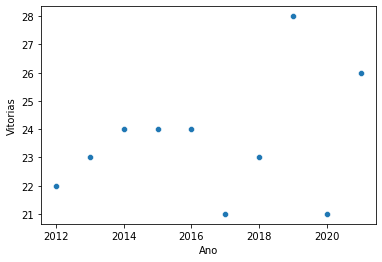

In [107]:
sns.scatterplot(x = 'Ano', y = dfBrasileirao['Vitorias'].where(dfBrasileirao['Posicao'] == 1) ,data=dfBrasileirao)
plt.show()


/Users/alexandrebomfim/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



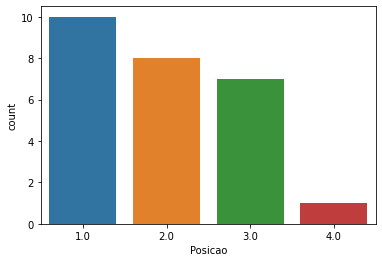

In [108]:
sns.countplot(dfBrasileirao['Posicao'].where(dfBrasileirao['Vitorias'] > 19));

#### Os quatro primeiros times vencem mais da metade dos jogos?

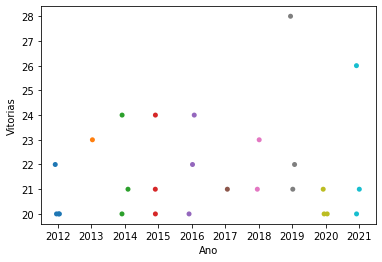

In [109]:
sns.stripplot(x='Ano',y = dfBrasileirao['Vitorias'].where(dfBrasileirao['Vitorias'] > 19), data=dfBrasileirao)
plt.show()

### 2. Qual média de vitorias dos times que vencem o campeonato?

In [110]:
listaBrasileirao['Vitorias'].where(listaBrasileirao['Posicao'] == 1).mean()

TypeError: list indices must be integers or slices, not str

### 3. E os times que fazem menos gols são os que caem?

#### Menos gols em todos os anos

In [ ]:
dfBrasileirao[dfBrasileirao['Gols Pro']==dfBrasileirao['Gols Pro'].min()]

,Posicao,Jogos,Empates,Derrotas,Vitorias,Ano,Pontos,Cartao Vermelho,Cartao Amarelo,Time,Gols Contra,Gols Pro,Saldo Gols
20,20,38,11,23,4,2018,23,9,98,Paraná,57,18,-39
85,20,38,11,24,3,2019,20,10,79,Avaí,62,18,-44


#### Menos gols por ano

In [ ]:

ltDfBr = []

for i in range(2012, 2022):
    filtro = dfBrasileirao['Ano'] == i
    ltDfBr.append(dfBrasileirao[filtro])

j = 0
menosGols = 0
for i in ltDfBr:
    filtro = i[ i['Gols Pro'] == i['Gols Pro'].min()]
    if j == 0:
        menosGols = filtro
    else:
        menosGols = menosGols.append(filtro)
    j+=1

menosGols.head()


,Posicao,Jogos,Empates,Derrotas,Vitorias,Ano,Pontos,Cartao Vermelho,Cartao Amarelo,Time,Gols Contra,Gols Pro,Saldo Gols
60,19,38,9,22,7,2012,30,6,102,Atlético,67,37,-30
143,15,38,14,13,11,2012,47,2,112,Bahia,41,37,-4
173,14,38,12,14,12,2012,48,2,94,PontePreta,44,37,-7
68,20,38,5,28,5,2013,20,3,77,Náutico,79,22,-57
31,20,38,11,20,7,2014,32,5,114,Criciuma,56,28,-28


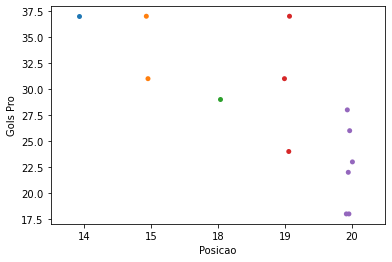

In [ ]:
sns.stripplot(x = 'Posicao', y = menosGols['Gols Pro'] ,data=menosGols)
plt.show()

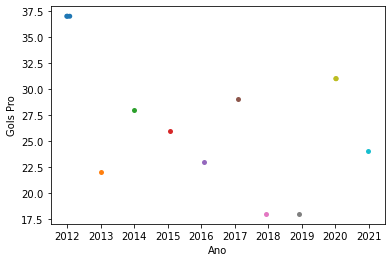

In [ ]:
sns.stripplot(x = 'Ano', y = menosGols['Gols Pro'] ,data=menosGols)
plt.show()

In [ ]:
grafico = px.scatter_matrix(menosGols, dimensions=['Posicao', 'Gols Pro', 'Ano'])
grafico.show()

### 4. Qual média de derrotas dos times que foram rebaixados?

<AxesSubplot:xlabel='Ano', ylabel='Derrotas'>

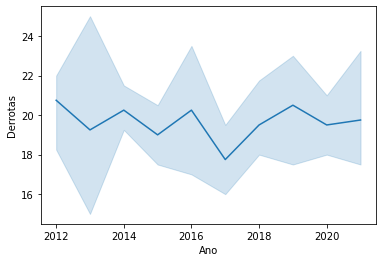

In [ ]:
filtro = dfBrasileirao['Posicao']>16
sns.lineplot(x="Ano", y="Derrotas", data=dfBrasileirao[filtro]) 

### 5. Os times que vencem os campeonatos são os times que fazem mais gols? 

#### Media de gols dos campeões

<AxesSubplot:xlabel='Ano', ylabel='Gols Pro'>

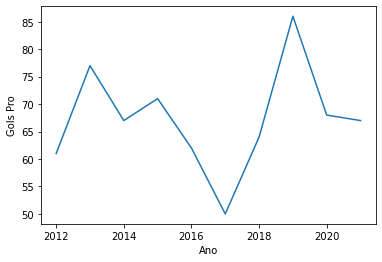

In [ ]:
filtro = dfBrasileirao['Posicao'] == 1
sns.lineplot(x="Ano", y="Gols Pro", data=dfBrasileirao[filtro]) 

<AxesSubplot:xlabel='Ano', ylabel='Gols Pro'>

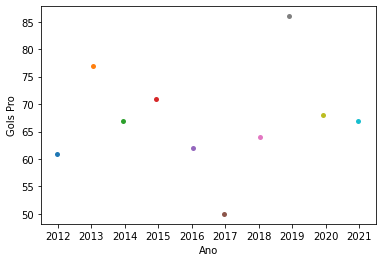

In [ ]:
filtro = dfBrasileirao['Posicao'] == 1
sns.stripplot(x="Ano", y="Gols Pro", data=dfBrasileirao[filtro]) 

#### Mais gols por anos

In [ ]:
ltDfBr = []

for i in range(2012, 2022):
    filtro = dfBrasileirao['Ano'] == i
    ltDfBr.append(dfBrasileirao[filtro])

j = 0
maisGols = 0
for i in ltDfBr:
    filtro = i[ i['Gols Pro'] == i['Gols Pro'].max()]
    if j == 0:
        maisGols = filtro
    else:
        maisGols = maisGols.append(filtro)
    j+=1

maisGols.head(13)

,Posicao,Jogos,Empates,Derrotas,Vitorias,Ano,Pontos,Cartao Vermelho,Cartao Amarelo,Time,Gols Contra,Gols Pro,Saldo Gols
79,2,38,12,6,20,2012,72,10,104,Atlético,37,64,27
109,1,38,7,8,23,2013,76,4,73,Cruzeiro,37,77,40
29,1,38,8,6,24,2014,80,2,70,Cruzeiro,38,67,29
165,1,38,9,5,24,2015,81,2,64,Corinthians,31,71,40
14,1,38,8,6,24,2016,80,0,95,Palmeiras,32,62,30
120,2,38,6,13,19,2017,63,4,87,Palmeiras,45,61,16
113,1,38,11,4,23,2018,80,5,117,Palmeiras,26,64,38
90,1,38,6,4,28,2019,90,3,90,Flamengo,37,86,49
75,1,38,8,9,21,2020,71,4,90,Flamengo,48,68,20
33,2,38,8,9,21,2021,71,4,82,Flamengo,36,69,33


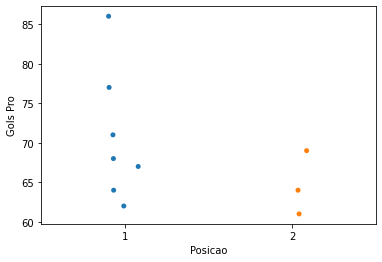

In [ ]:
sns.stripplot(x = 'Posicao', y = maisGols['Gols Pro'] ,data=maisGols)
plt.show()

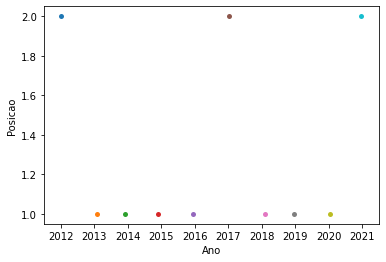

In [ ]:
sns.stripplot(x = 'Ano', y = 'Posicao' ,data=maisGols)
plt.show()

### 6. Os time que tomam menos gols, ficam em qual zona na tabela? 

#### Menos gols sofridos geral

<AxesSubplot:xlabel='Ano', ylabel='Posicao'>

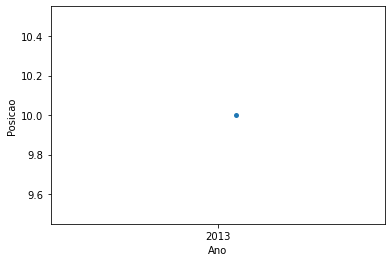

In [ ]:
filtro = dfBrasileirao[dfBrasileirao['Gols Contra'] == dfBrasileirao['Gols Contra'].min()]
sns.stripplot(x="Ano", y="Posicao", data=filtro) 

#### Menos Gols sofridos por Ano

In [ ]:
ltDfBr = []

for i in range(2012, 2022):
    filtro = dfBrasileirao['Ano'] == i
    ltDfBr.append(dfBrasileirao[filtro])

j = 0
menosGolsSofridos = 0
for i in ltDfBr:
    filtro = i[ i['Gols Contra'] == i['Gols Contra'].min()]
    if j == 0:
        menosGolsSofridos = filtro
    else:
        menosGolsSofridos = menosGolsSofridos.append(filtro)
    j+=1

menosGolsSofridos.head(13)

,Posicao,Jogos,Empates,Derrotas,Vitorias,Ano,Pontos,Cartao Vermelho,Cartao Amarelo,Time,Gols Contra,Gols Pro,Saldo Gols
12,1,38,11,5,22,2012,77,3,85,Fluminense,33,61,28
126,3,38,11,7,20,2012,71,9,102,Grêmio,33,56,23
32,10,38,17,10,11,2013,50,3,66,Corinthians,22,27,5
168,7,38,10,11,17,2014,61,3,95,Grêmio,24,36,12
165,1,38,9,5,24,2015,81,2,64,Corinthians,31,71,40
14,1,38,8,6,24,2016,80,0,95,Palmeiras,32,62,30
51,6,38,6,15,17,2016,57,1,76,Atlético,32,38,6
159,1,38,9,8,21,2017,72,1,81,Corinthians,30,50,20
113,1,38,11,4,23,2018,80,5,117,Palmeiras,26,64,38
18,6,38,12,9,17,2019,63,7,87,SãoPaulo,30,39,9


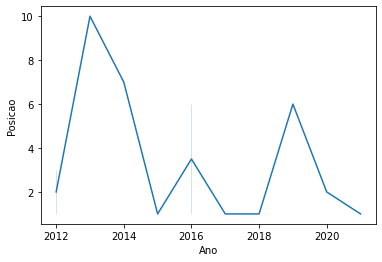

In [111]:
sns.lineplot(x = 'Ano', y = 'Posicao' ,data=menosGolsSofridos)
plt.show()

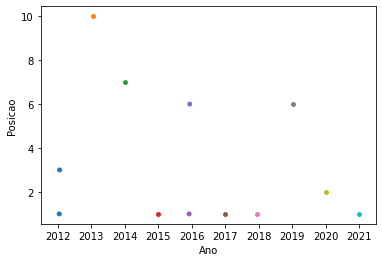

In [ ]:
sns.stripplot(x = 'Ano', y = 'Posicao' ,data=menosGolsSofridos)
plt.show()

# Analise Futura
Posteirormente, as proximas perguntas que iremos responder serão as seguites:
1. O time que vence o campeonato é o time que mais faz pontos no primeiro ciclo de jogos?
2. O time que mais chuta é o time que mais faz gol?
3. Os 3 primeiros artilheiros do campeonato, refletem no time ficar nas zonas excelentes ou ótimas?
4. Os times que fazem mais gols em um jogo, ficam em qual zona da tabela?
5. Os times que tomam mais gols em um jogo, ficam em qual zona da tabela?
6. O time com mais média de posse de bola, fica em qual zona da tabela?
7. Existe um esquema tatico mais vencedor no campeonato?
8. O time que vence o campeonato, vence mais que os outros dentro e fora de casa?